In [1]:
!pip install vaderSentiment


In [2]:
import nltk
import string
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Download NLTK data (if needed)
nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
# Define a function to read in text files
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Example text file loading
text_1400s = [
    read_text_from_file('malleus_maleficarum-1487.txt'),
    read_text_from_file('Innocent_VIII_BULL_Summis_desiderantes_1484.txt'),
    read_text_from_file('Johannes_Nider_the_ANT HILL_circa_1437.txt')
]

text_1500s = [
    read_text_from_file('defense_of_witchcraft_16th_century.txt'),
    read_text_from_file('The Discoverie of Witchcraft 1584.txt')
]

text_1600s = [
    read_text_from_file('Village_Mohra_1669_1670.txt'),
    read_text_from_file('Malmoe_boy_1678.txt'),
    read_text_from_file('A Treatise of Witchcraft 1616.txt')
]

In [4]:
# Define stopwords for preprocessing
stop_words = set(nltk.corpus.stopwords.words('english'))

# Preprocess function to clean and tokenize text
def preprocess_text(text):
    # Tokenize the text and remove punctuation and stopwords
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word not in string.punctuation and word not in stop_words]
    return ' '.join(tokens)  # Return cleaned text

# Preprocess texts for each time period
text_1400s_preprocessed = [preprocess_text(text) for text in text_1400s]
text_1500s_preprocessed = [preprocess_text(text) for text in text_1500s]
text_1600s_preprocessed = [preprocess_text(text) for text in text_1600s]


In [11]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score using VADER
def get_sentiment_vader(text):
    sentiment_score = analyzer.polarity_scores(text)
    return sentiment_score['compound']  # Compound score indicates overall sentiment

# Function to analyze sentiment for the word 'witch' across texts using VADER
def analyze_sentiment_for_word_vader(texts, word='witch'):
    sentiments = []
    for text in texts:
        sentences = nltk.sent_tokenize(text)  # Tokenize the text into sentences
        word_sentiments = []
        
        for sentence in sentences:
            if word in sentence.lower():  # Check if the word 'witch' appears in the sentence
                word_sentiments.append(get_sentiment_vader(sentence))
        
        # Take the average sentiment for the text
        if word_sentiments:
            sentiments.append(sum(word_sentiments) / len(word_sentiments))
        else:
            sentiments.append(0)  # Default to 0 if 'witch' is not mentioned in the text
    
    return sentiments


In [12]:
# Function to get the frequency of the word 'witch' (or related words)
def get_word_frequency(texts, word='witch'):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(texts)
    
    # Get the index of the word 'witch' in the feature matrix
    word_index = vectorizer.get_feature_names_out().tolist().index(word)
    
    # Count the occurrences of 'witch' in each text
    word_counts = X[:, word_index].toarray()
    
    return word_counts.sum()


In [13]:
# Sentiment analysis for the word 'witch' across different time periods
sentiments_1400s = analyze_sentiment_for_word_vader(text_1400s_preprocessed)
sentiments_1500s = analyze_sentiment_for_word_vader(text_1500s_preprocessed)
sentiments_1600s = analyze_sentiment_for_word_vader(text_1600s_preprocessed)

# Frequency of the word 'witch' in each time period
witch_frequency_1400s = get_word_frequency(text_1400s_preprocessed)
witch_frequency_1500s = get_word_frequency(text_1500s_preprocessed)
witch_frequency_1600s = get_word_frequency(text_1600s_preprocessed)


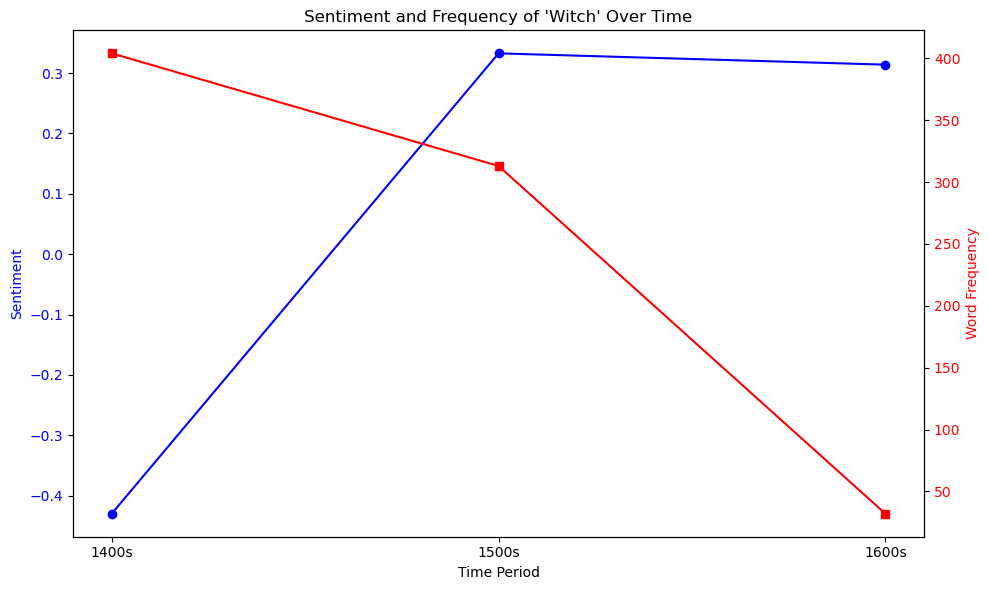

In [14]:
# Plot sentiment over time
time_periods = ['1400s', '1500s', '1600s']
sentiments = [sum(sentiments_1400s)/len(sentiments_1400s), 
              sum(sentiments_1500s)/len(sentiments_1500s), 
              sum(sentiments_1600s)/len(sentiments_1600s)]

# Plot word frequency over time
witch_frequencies = [witch_frequency_1400s, witch_frequency_1500s, witch_frequency_1600s]

# Create figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot sentiment
ax1.plot(time_periods, sentiments, color='blue', marker='o', label='Sentiment')
ax1.set_xlabel('Time Period')
ax1.set_ylabel('Sentiment', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for frequency
ax2 = ax1.twinx()
ax2.plot(time_periods, witch_frequencies, color='red', marker='s', label='Frequency')
ax2.set_ylabel('Word Frequency', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and show the plot
plt.title("Sentiment and Frequency of 'Witch' Over Time")
fig.tight_layout()  # Adjust layout
plt.show()


In [15]:
# Function to calculate normalized frequency (TF) of "witch" in a given text
def calculate_normalized_frequency(text, word="witch"):
    words = nltk.word_tokenize(text.lower())
    total_words = len(words)
    word_count = words.count(word.lower())
    return word_count / total_words if total_words > 0 else 0

# Calculate the average sentiment for each time period
average_sentiment_1400s = sum(sentiments_1400s) / len(sentiments_1400s) if sentiments_1400s else 0
average_sentiment_1500s = sum(sentiments_1500s) / len(sentiments_1500s) if sentiments_1500s else 0
average_sentiment_1600s = sum(sentiments_1600s) / len(sentiments_1600s) if sentiments_1600s else 0


# Normalize frequencies for each time period
normalized_frequency_1400s = [calculate_normalized_frequency(text, "witch") for text in text_1400s]
normalized_frequency_1500s = [calculate_normalized_frequency(text, "witch") for text in text_1500s]
normalized_frequency_1600s = [calculate_normalized_frequency(text, "witch") for text in text_1600s]

# Calculate the average normalized frequency per time period
average_normalized_frequency_1400s = sum(normalized_frequency_1400s) / len(normalized_frequency_1400s) if normalized_frequency_1400s else 0
average_normalized_frequency_1500s = sum(normalized_frequency_1500s) / len(normalized_frequency_1500s) if normalized_frequency_1500s else 0
average_normalized_frequency_1600s = sum(normalized_frequency_1600s) / len(normalized_frequency_1600s) if normalized_frequency_1600s else 0

# Print results for normalized frequency and sentiment
def print_normalized_results(time_periods, sentiments, frequencies):
    print("Normalized Sentiment and Frequency of the word 'witch' over Time Periods:")
    for time_period, sentiment, frequency in zip(time_periods, sentiments, frequencies):
        print(f"\n{time_period}:")
        print(f"Average Sentiment Score: {sentiment:.4f}")
        print(f"Average Normalized Frequency of 'witch': {frequency:.4f}")

# Time periods
time_periods = ['1400s', '1500s', '1600s']
sentiments = [average_sentiment_1400s, average_sentiment_1500s, average_sentiment_1600s]
frequencies = [average_normalized_frequency_1400s, average_normalized_frequency_1500s, average_normalized_frequency_1600s]

# Print the results
print_normalized_results(time_periods, sentiments, frequencies)


Normalized Sentiment and Frequency of the word 'witch' over Time Periods:

1400s:
Average Sentiment Score: -0.4298
Average Normalized Frequency of 'witch': 0.0014

1500s:
Average Sentiment Score: 0.3326
Average Normalized Frequency of 'witch': 0.0008

1600s:
Average Sentiment Score: 0.3138
Average Normalized Frequency of 'witch': 0.0003


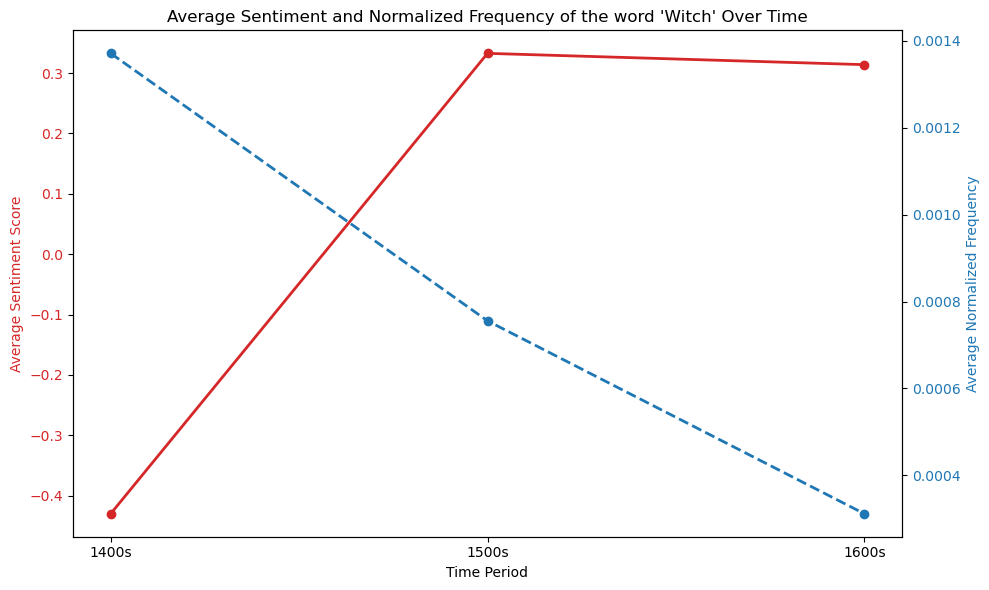

In [16]:


# Data for the time periods, sentiment, and normalized frequency
time_periods = ['1400s', '1500s', '1600s']
sentiments = [average_sentiment_1400s, average_sentiment_1500s, average_sentiment_1600s]
frequencies = [average_normalized_frequency_1400s, average_normalized_frequency_1500s, average_normalized_frequency_1600s]

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot sentiment data
color = 'tab:red'
ax1.set_xlabel('Time Period')
ax1.set_ylabel('Average Sentiment Score', color=color)
ax1.plot(time_periods, sentiments, color=color, marker='o', label='Sentiment', linestyle='-', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for normalized frequency
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Normalized Frequency', color=color)
ax2.plot(time_periods, frequencies, color=color, marker='o', label='Frequency', linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title("Average Sentiment and Normalized Frequency of the word 'Witch' Over Time")

# Show the plot
fig.tight_layout()
plt.show()
